Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import decomposition
import seaborn as sns
#from sklearn.datasets import load_titanic


In [16]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [17]:
titanic.size

18340

In [18]:
len(titanic.columns)

14

In [23]:
len(titanic.index)

1310

In [24]:
titanic.keys()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [26]:
print(titanic['name'])

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
1309                                                NaN
Name: name, Length: 1310, dtype: object


In [31]:
titanic_s=titanic['sex']
titanic_s

0       female
1         male
2       female
3         male
4       female
         ...  
1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, Length: 1310, dtype: object

([<matplotlib.patches.Wedge at 0x267ed606108>,
 [Text(-0.9893411941747885, -0.4808367722094511, 'male'),
  Text(0.9893412391939719, 0.4808366795806413, 'female')],
 [Text(-0.5396406513680664, -0.26227460302333694, '64.4%'),
  Text(0.5396406759239846, 0.2622745524985316, '35.6%')])

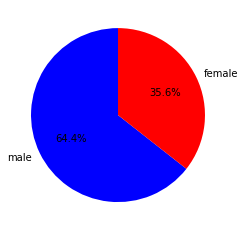

In [56]:
labels=titanic_s.value_counts().index.values.tolist()
value=titanic_s.value_counts().values.tolist()
#labels
#value
#colors = ['blue', 'red']
plt.pie(value, labels= labels, colors=colors, startangle=90, autopct='%.1f%%')


Text(0.5, 1.0, 'Fare paid and the Age')

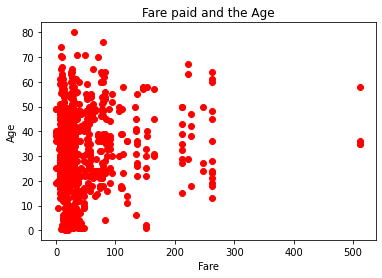

In [74]:
colors = {'male':'orange', 'female':'red'}
plt.scatter(titanic.fare,titanic.age,c=titanic['sex'].iloc[:1].apply(lambda x: colors[x]))
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare paid and the Age')

Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
Expected Output:

Text(0, 0.5, 'Min and max temp')

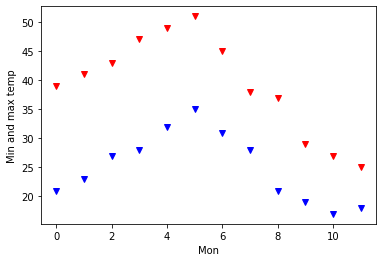

In [6]:
import numpy as np
tmax = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
tmin = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
mon = np.arange(12)
plt.plot(mon,tmax, 'rv')
plt.plot(mon, tmin, 'bv')
plt.xlabel('Mon')
plt.ylabel('Min and max temp')

In [7]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, mon,
                                      tmax, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, mon,
                                      tmin, [-40, 20, 0])

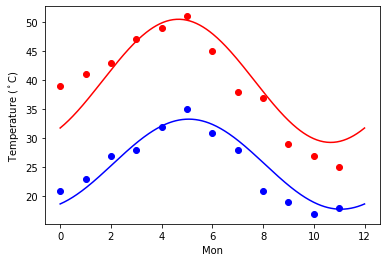

In [8]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(mon, tmax, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(mon, tmin, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Mon')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()